In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
Bike=pd.read_csv('/content/drive/MyDrive/My Data/AIML/Simple Linear Regression/Bike Case Study/day.csv')

In [4]:
Bike.shape

(730, 16)

In [5]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
Bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
Bike.duplicated().sum()

0

In [9]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
Bike=Bike.drop(['instant','casual','registered'],axis=1)

In [11]:
Bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
Bike.weekday = Bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [13]:
Bike.mnth =Bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'Dec'})

In [14]:
new_year = {0: 2018, 1: 2019}

In [15]:
Bike["yr"] = Bike["yr"].map(new_year)

In [16]:
Bike["yr"].unique()

array([2018, 2019])

In [17]:
new_season = {1: 'spring',2:'summer',3:'fall',4:'winter'}

In [18]:
Bike["season"] = Bike["season"].map(new_season)

In [19]:
Bike["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [20]:
new_weather = {1 : "Clear", 2 : "Cloudy", 3 : "Light Rain"}

In [21]:
Bike["weathersit"] = Bike["weathersit"].map(new_weather)

In [22]:
Bike["weathersit"].unique()

array(['Cloudy', 'Clear', 'Light Rain'], dtype=object)

EXPLORATORY DATA ANALYSIS

BY WORKDAY ANALYSIS

In [23]:
workday_count = Bike.groupby("workingday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
workday_count

,workingday,cnt
1,1,2290576
0,0,1000269


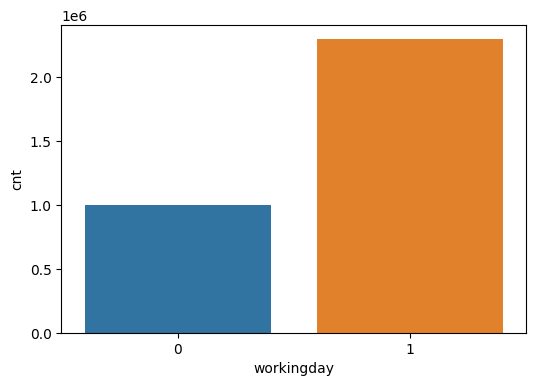

In [24]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.barplot(data = workday_count, x = "workingday" , y = "cnt");

In [25]:
np.round(100 * ( workday_count["cnt"][1] - workday_count["cnt"][0] ) / workday_count["cnt"][0] , 2)

129.0

It can be observed that the no. of bikes rented on working day is 129% more than on holidays

BY YEAR ANALYSIS

In [26]:
year_count = Bike.groupby("yr")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)

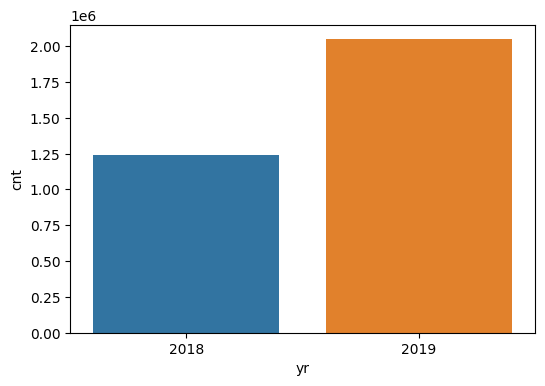

In [27]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.barplot(data = year_count, x = "yr" , y = "cnt");

In [28]:
year_count

,yr,cnt
1,2019,2047742
0,2018,1243103


In [29]:
np.round(100 * ( year_count["cnt"][1] - year_count["cnt"][0] ) / year_count["cnt"][0] , 2)

64.73

It can be observed that the no. of bikes rented in 2019 increased by 64.7% than the year 2018.

WEEKDAY WISE ANALYSIS

<Axes: xlabel='weekday', ylabel='cnt'>

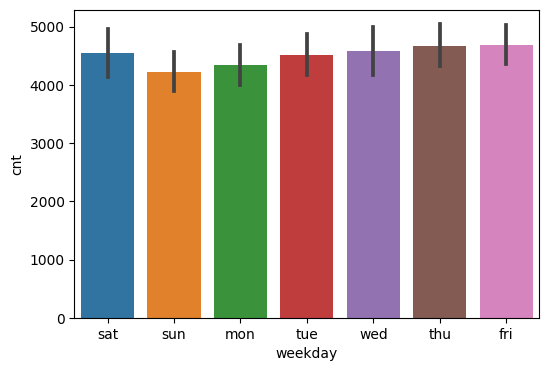

In [30]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.barplot(data = Bike, x = "weekday" , y = "cnt")

BY SEASON ANALYSIS

   season      cnt
0    fall  1061129
1  spring   469514
2  summer   918589
3  winter   841613


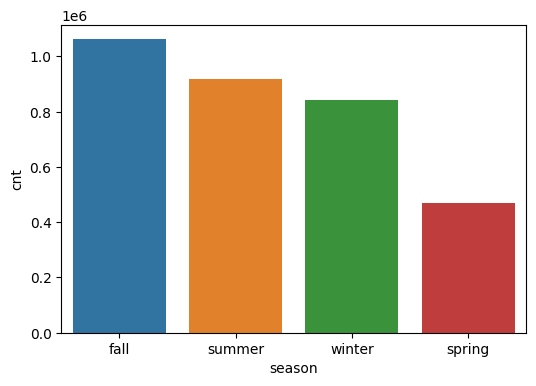

In [75]:
season_cnt = Bike.groupby("season")["cnt"].sum().reset_index()


print(season_cnt)
plt.figure(figsize=(6,4))

sns.barplot(data=season_cnt.sort_values(by="cnt", ascending=False), x="season" ,y="cnt")

# Display the plot.
plt.show()

Duplicate and dummy variable creation

In [31]:
new_bike=Bike.copy()
new_bike=new_bike.drop(['dteday'],axis=1)

In [32]:
bike_dummy=Bike.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64 



2018    365
2019    365
Name: yr, dtype: int64 



jan     62
mar     62
may     62
july    62
aug     62
oct     62
Dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



Clear         463
Cloudy        246
Light Rain     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64 

In [33]:
columns_to_convert = ['season', 'weathersit', 'mnth', 'weekday']

for col in columns_to_convert:
    new_bike[col] = new_bike[col].astype('category')
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [34]:
new_bike=pd.get_dummies(new_bike,drop_first=True)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_apr               730 non-null    uint8  
 12  mnth_aug               730 non-null    uint8  
 13  mnth_feb               730 non-null    uint8  
 14  mnth_jan               730 non-null    uint8  
 15  mnth_j

In [35]:
new_bike.shape

(730, 30)

In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(new_bike, train_size = 0.70, test_size = 0.30, random_state = 100)

In [37]:
df_train.info

<bound method DataFrame.info of        yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
653  2019        0           1  19.201653  23.04230  55.8333  12.208807  7534   
576  2019        0           1  29.246653  33.14480  70.4167  11.083475  7216   
426  2019        0           0  16.980847  20.67460  62.1250  10.792293  4066   
728  2019        0           0  10.489153  11.58500  48.3333  23.500518  1796   
482  2019        0           0  15.443347  18.87520  48.9583   8.708325  4220   
..    ...      ...         ...        ...       ...      ...        ...   ...   
526  2019        0           1  29.554153  32.98605  58.7917  13.916771  6664   
578  2019        0           1  30.852500  35.35440  65.9583   8.666718  7261   
53   2018        0           1   9.091299  12.28585  42.3043   6.305571  1917   
350  2018        0           0  10.591653  12.46855  56.0833  16.292189  2739   
79   2018        0           1  17.647835  20.48675  73.7391  19.348461  2077

In [38]:
df_train.shape

(510, 30)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   atemp                  219 non-null    float64
 5   hum                    219 non-null    float64
 6   windspeed              219 non-null    float64
 7   cnt                    219 non-null    int64  
 8   season_spring          219 non-null    uint8  
 9   season_summer          219 non-null    uint8  
 10  season_winter          219 non-null    uint8  
 11  mnth_apr               219 non-null    uint8  
 12  mnth_aug               219 non-null    uint8  
 13  mnth_feb               219 non-null    uint8  
 14  mnth_jan               219 non-null    uint8  
 15  mnth_

In [40]:
df_test.shape

(219, 30)

In [41]:
scaler = MinMaxScaler()

In [42]:
# Applying scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [43]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy,weathersit_Light Rain
653,2019,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,2019,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


In [44]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy,weathersit_Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_apr', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_july', False, 14),
 ('mnth_june', True, 1),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 15),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain', True, 1)]

In [48]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_apr', 'mnth_aug', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_sep', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [49]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_summer', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [50]:
#Calculating VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [51]:
X_train_rfe = X_train[col]

In [52]:
calculateVIF(X_train_rfe)

,Features,VIF
0,yr,69.96
3,hum,39.89
2,temp,21.86
4,windspeed,5.53
5,season_spring,5.40
6,season_winter,4.21
13,weathersit_Cloudy,2.37
7,mnth_apr,1.97
8,mnth_aug,1.95
11,mnth_may,1.84


In [53]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          8.42e-181
Time:                        16:14:14   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -374.66

In [54]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['season_winter'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,yr,53.65
3,hum,38.85
2,temp,16.01
4,windspeed,5.53
5,season_spring,2.47
12,weathersit_Cloudy,2.36
7,mnth_aug,1.68
8,mnth_june,1.49
11,mnth_sep,1.37
10,mnth_may,1.36


In [55]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          8.42e-181
Time:                        16:14:14   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -374.66

In [56]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_apr'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,yr,52.16
3,hum,38.23
2,temp,16.01
4,windspeed,5.38
11,weathersit_Cloudy,2.34
5,season_spring,2.30
6,mnth_aug,1.63
7,mnth_june,1.44
10,mnth_sep,1.34
9,mnth_may,1.31


In [57]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          7.28e-180
Time:                        16:14:14   Log-Likelihood:                 487.00
No. Observations:                 510   AIC:                            -946.0
Df Residuals:                     496   BIC:                            -886.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -473.85

In [58]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,yr,20.66
2,temp,15.72
3,windspeed,4.91
4,season_spring,2.30
5,mnth_aug,1.63
10,weathersit_Cloudy,1.61
6,mnth_june,1.42
9,mnth_sep,1.34
8,mnth_may,1.30
7,mnth_mar,1.27


In [59]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          2.71e-179
Time:                        16:14:14   Log-Likelihood:                 482.89
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     497   BIC:                            -884.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -478.62

Residual Analysis of the train data and validation

In [60]:
X_train_lm_5

,const,yr,holiday,temp,windspeed,season_spring,mnth_aug,mnth_june,mnth_mar,mnth_may,mnth_sep,weathersit_Cloudy,weathersit_Light Rain
653,1.0,2019,0,0.509887,0.300794,0,0,0,0,0,0,0,0
576,1.0,2019,0,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1.0,2019,0,0.442393,0.255342,1,0,0,1,0,0,1,0
728,1.0,2019,0,0.245101,0.663106,1,0,0,0,0,0,0,0
482,1.0,2019,0,0.395666,0.188475,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,2019,0,0.824514,0.355596,0,0,1,0,0,0,1,0
578,1.0,2019,0,0.863973,0.187140,0,1,0,0,0,0,0,0
53,1.0,2018,0,0.202618,0.111379,1,0,0,0,0,0,0,0
350,1.0,2018,0,0.248216,0.431816,0,0,0,0,0,0,1,0


In [61]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

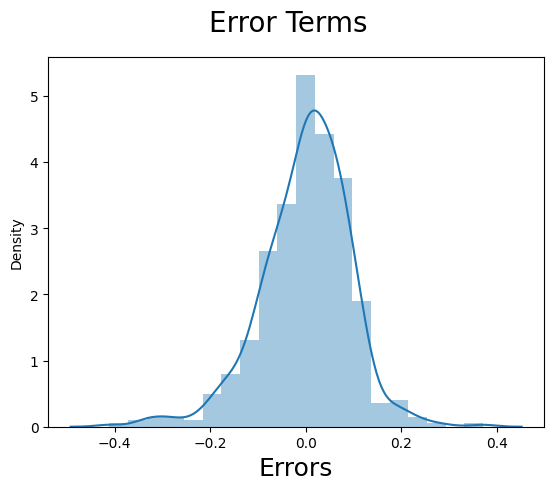

In [62]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [63]:
calculateVIF(X_train_new)

,Features,VIF
0,yr,20.66
2,temp,15.72
3,windspeed,4.91
4,season_spring,2.30
5,mnth_aug,1.63
10,weathersit_Cloudy,1.61
6,mnth_june,1.42
9,mnth_sep,1.34
8,mnth_may,1.30
7,mnth_mar,1.27


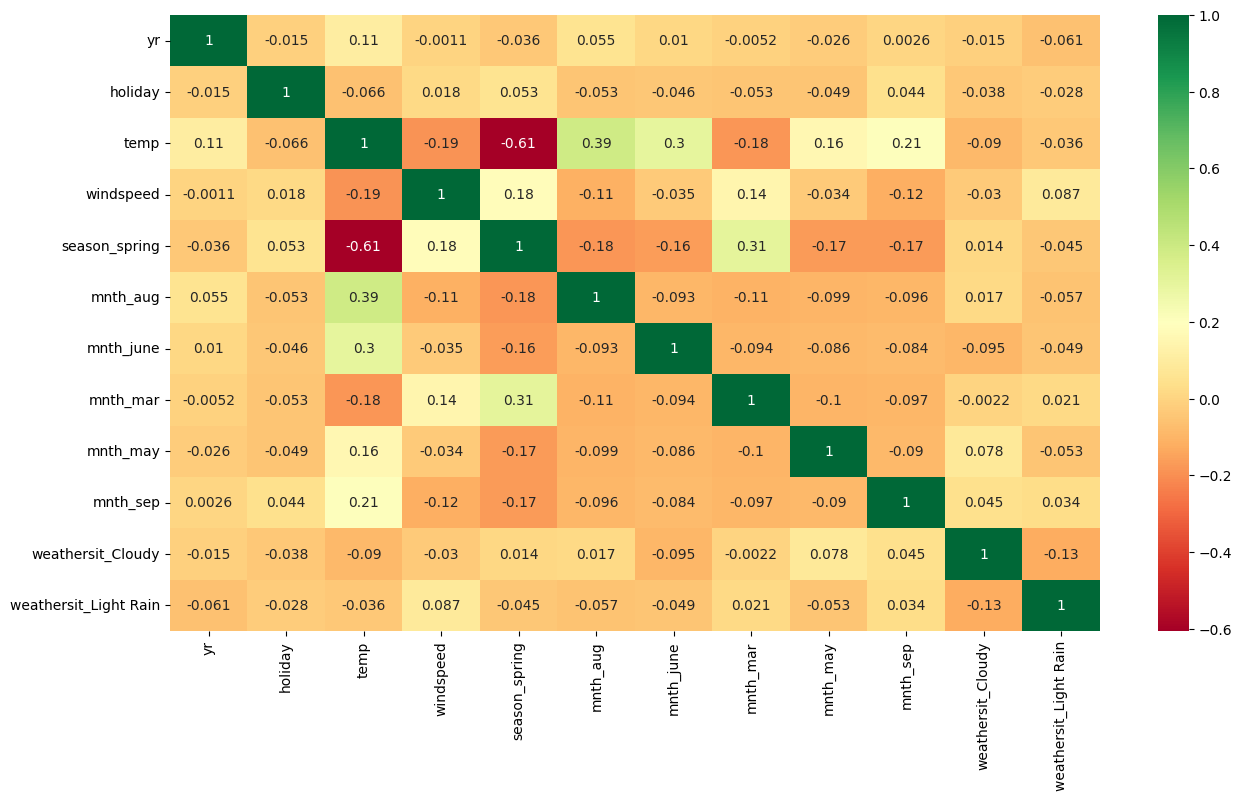

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

Making Predictions Using the Final Model

In [65]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy,weathersit_Light Rain
184,2018,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,2019,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,2018,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,2018,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,2018,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [66]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Cloudy,weathersit_Light Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2018.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,2018.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2019.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)
y_pred = lr_5.predict(X_test_lm_5)


In [69]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8036

Text(0, 0.5, 'y_pred')

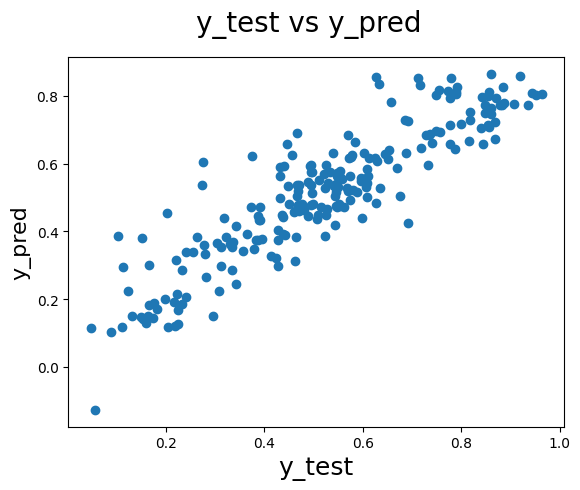

In [70]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [71]:
round(lr_5.params,4)

const                   -478.6280
yr                         0.2373
holiday                   -0.0841
temp                       0.3301
windspeed                 -0.1526
season_spring             -0.1572
mnth_aug                   0.0063
mnth_june                  0.0138
mnth_mar                   0.0368
mnth_may                   0.0277
mnth_sep                   0.0776
weathersit_Cloudy         -0.0807
weathersit_Light Rain     -0.2790
dtype: float64

In [72]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7922


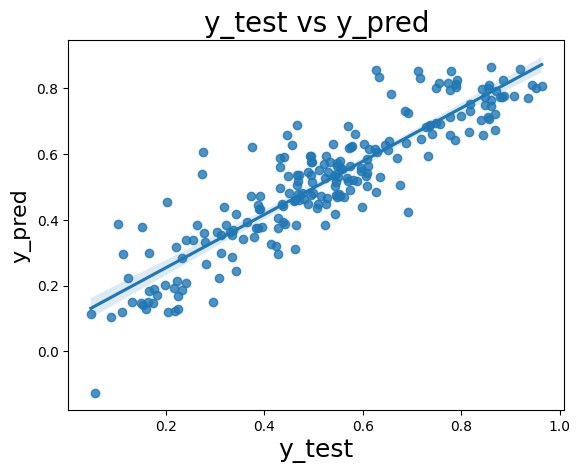

In [73]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [74]:
Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.825
- Test dataset R^2           : 0.821
- Train dataset Adjusted R^2 : 0.829
- Test dataset Adjusted R^2  : 0.8036

SyntaxError: ignored